# Redfin Data Analysis
### by Sravanthi Mummadi & Chitra Ramakrishnan
add git hub here

In [1]:
#load neccessary modules
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')

### Data Extraction

https://www.redfin.com/blog/data-center/

Downloded redfin house sold data for Washington area from redfin data center for the period 2012 to 2019. The data set has 23 columns and 79808 entries. The columns include Avg Sale to List, Avg Sale To List Mom, Avg Sale To List Yoy,Homes Sold,Homes Sold Mom,Homes Sold Yoy,Inventory,Inventory Mom,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,New Listings,New Listings Mom,New Listings Yoy,Period End ,Property Type,Region,Region Type,State Code.

*Avg sale to list-
*Homes Sold- Count of Homes Sold
*Inventory- List of all the homes available for sale(including new listings and pending sales)
*New Listings- Count of houses added newly to the listing
*Mom- Month over month rate
*Yoy- Year over year rate.


In [ ]:
#import the file to pandas data frame 
#https://www.redfin.com/blog/data-center/ - Data Source
path = 'C:\\Users\\bhara\\Downloads\\capstoneredfin.xlsx'
redfin = pd.read_excel(path, na_values=["NaN"])
redfin.head()


In [5]:
redfin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79808 entries, 0 to 79807
Data columns (total 23 columns):
Avg Sale To List         79784 non-null float64
Avg Sale To List Mom     75353 non-null float64
Avg Sale To List Yoy     68242 non-null float64
Homes Sold               79808 non-null int64
Homes Sold Mom           75378 non-null float64
Homes Sold Yoy           68261 non-null float64
Inventory                63212 non-null float64
Inventory Mom            57530 non-null float64
Inventory Yoy            52927 non-null float64
Median Dom               79219 non-null float64
Median Dom Mom           74775 non-null float64
Median Dom Yoy           67675 non-null float64
Median Sale Price        79808 non-null object
Median Sale Price Mom    75378 non-null float64
Median Sale Price Yoy    68261 non-null float64
New Listings             72697 non-null float64
New Listings Mom         68014 non-null float64
New Listings Yoy         62407 non-null float64
Period End               79808

In [6]:
#copy the data frame to temp df data to modify and visualize
data=redfin


In [7]:
# data cleaning remove unneccesary columns
data = data.drop(data.columns[[1,2,4,5,7,8,10,11,13,14,16,17]], axis = 1)

In [8]:
data.head()

,Avg Sale To List,Homes Sold,Inventory,Median Dom,Median Sale Price,New Listings,Period End,Property Type,Region,Region Type,State Code
0,0.966591,51,49.0,49.0,$225K,51.0,2012-02-29,Condo/Co-op,"Seattle, WA - Capitol Hill",Neighborhood,WA
1,1.000000,1,3.0,260.0,$34K,4.0,2012-06-30,Condo/Co-op,"Everett, WA - Evergreen",Neighborhood,WA
2,0.941441,1,7.0,184.0,$418K,4.0,2012-08-31,Condo/Co-op,"Olympia, WA - Northwest Olympia",Neighborhood,WA
3,0.937062,1,1.0,118.0,$187K,1.0,2013-01-31,Condo/Co-op,"Renton, WA - President Park",Neighborhood,WA
4,1.041477,2,2.0,9.0,$99K,3.0,2013-11-30,Condo/Co-op,"Vancouver, WA - Bagley Downs",Neighborhood,WA


In [9]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79808 entries, 0 to 79807
Data columns (total 11 columns):
Avg Sale To List     79784 non-null float64
Homes Sold           79808 non-null int64
Inventory            63212 non-null float64
Median Dom           79219 non-null float64
Median Sale Price    79808 non-null object
New Listings         72697 non-null float64
Period End           79808 non-null datetime64[ns]
Property Type        79808 non-null object
Region               79808 non-null object
Region Type          79808 non-null object
State Code           79808 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 6.7+ MB


(79808, 11)

In [10]:
data.describe(include="all")

,Avg Sale To List,Homes Sold,Inventory,Median Dom,Median Sale Price,New Listings,Period End,Property Type,Region,Region Type,State Code
count,79784.000000,79808.000000,63212.000000,79219.000000,79808,72697.000000,79808,79808,79808,79808,79808
unique,NaN,NaN,NaN,NaN,1738,NaN,85,4,403,1,1
top,NaN,NaN,NaN,NaN,$300K,NaN,2017-10-31 00:00:00,Single Family Residential,"Seattle, WA - Ballard",Neighborhood,WA
freq,NaN,NaN,NaN,NaN,565,NaN,1031,31935,340,79808,79808
first,NaN,NaN,NaN,NaN,NaN,NaN,2012-02-29 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28 00:00:00,NaN,NaN,NaN,NaN
mean,1.002031,14.917176,11.178716,42.206207,NaN,18.019973,NaN,NaN,NaN,NaN,NaN
std,0.045096,33.867637,25.393116,75.563573,NaN,39.461510,NaN,NaN,NaN,NaN,NaN
min,0.500000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,0.982268,2.000000,2.000000,8.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN


In [11]:
#update column names
data.columns = [x.replace(" ","_") for x in list(data.columns)]


### Data Cleaning

In [12]:
# checking for Duplicates
data.drop_duplicates(inplace=True)
data.shape 
# only 3 duplicates are there

(79785, 11)

In [13]:
# remove $ symbol from median sale price
def formatprice(coln):
    data[coln] = [(str(x[1:-1]).replace(",",""))+"000" for x in data[coln]]
formatprice("Median_Sale_Price")

In [14]:
# convert sale price toint
data['Median_Sale_Price'] = data['Median_Sale_Price'].astype(dtype=np.int64)

In [15]:
# convert to date
#data['Period_End'] =pd.to_datetime(data['Period_End'])
#data.info
#create year column:
data['Year'] = pd.DatetimeIndex((data['Period_End'])).year
#create month column
data['Month'] = pd.DatetimeIndex(data['Period_End']).month

In [16]:
# create month year column for visualization:
def setyear(row):
    if row == 1:
        return "Jan"
    if row == 2:
        return "Feb"
    if row == 3:
        return "Mar"
    if row == 4:
        return "Apr"
    if row == 5:
        return "May"
    if row == 6:
        return "Jun"
    if row == 7:
        return "Jul"
    if row == 8:
        return "Aug"
    if row == 9:
        return "Sep"
    if row == 10:
        return "Oct"
    if row == 11:
        return "Nov"
    if row == 12:
        return "Dec"
    
data['MonthOfYear'] = data['Month'].apply(lambda row: setyear(row))
data['Year'] = data['Year'].astype(str)
#homessold['MonthOfYear']= homessold['MonthOfYear']+"-"+homessold["Year"]
data['MonthOfYear']= data['MonthOfYear']+"-"+data["Year"]
data['MonthOfYear'] = data['MonthOfYear'].astype(str)

In [17]:
# add city column 
data['City'] = data['Region'].apply(lambda x: (x.split(",")[0]))
data.head()


,Avg_Sale_To_List,Homes_Sold,Inventory,Median_Dom,Median_Sale_Price,New_Listings,Period_End,Property_Type,Region,Region_Type,State_Code,Year,Month,MonthOfYear,City
0,0.966591,51,49.0,49.0,225000,51.0,2012-02-29,Condo/Co-op,"Seattle, WA - Capitol Hill",Neighborhood,WA,2012,2,Feb-2012,Seattle
1,1.000000,1,3.0,260.0,34000,4.0,2012-06-30,Condo/Co-op,"Everett, WA - Evergreen",Neighborhood,WA,2012,6,Jun-2012,Everett
2,0.941441,1,7.0,184.0,418000,4.0,2012-08-31,Condo/Co-op,"Olympia, WA - Northwest Olympia",Neighborhood,WA,2012,8,Aug-2012,Olympia
3,0.937062,1,1.0,118.0,187000,1.0,2013-01-31,Condo/Co-op,"Renton, WA - President Park",Neighborhood,WA,2013,1,Jan-2013,Renton
4,1.041477,2,2.0,9.0,99000,3.0,2013-11-30,Condo/Co-op,"Vancouver, WA - Bagley Downs",Neighborhood,WA,2013,11,Nov-2013,Vancouver


In [18]:
# replace missing values
# sum of missing values for each column
nullcols = data.columns[data.isnull().any()]
data[nullcols].isnull().sum()

Avg_Sale_To_List       24
Inventory           16576
Median_Dom            589
New_Listings         7096
dtype: int64

In [19]:
# avg sale to list and Median Dom missing values are few so we can use ffill or bfill
#data["Avg_Sale_To_List"].fillna(method='ffill',inplace=True)

In [20]:
# create a df with median values to update for other columns
mediandf = data.groupby(['Region','Year','Month']).median(skipna=True).reset_index()
mediandf.head()



,Region,Year,Month,Avg_Sale_To_List,Homes_Sold,Inventory,Median_Dom,Median_Sale_Price,New_Listings
0,"Anacortes, WA - Central Anacortes",2012,2,0.985985,7.0,3.0,59.0,119000,3.0
1,"Anacortes, WA - Central Anacortes",2012,3,1.014632,4.0,4.0,41.0,106000,4.0
2,"Anacortes, WA - Central Anacortes",2012,4,0.984776,1.5,4.0,3.0,179500,2.5
3,"Anacortes, WA - Central Anacortes",2012,5,0.974899,1.0,7.0,3.5,186000,3.5
4,"Anacortes, WA - Central Anacortes",2012,6,0.989305,1.0,6.0,6.5,185000,7.0


In [21]:
# create a null df for each column that needs to be updated
Avg_Sale_To_Listnull = data[data['Avg_Sale_To_List'].isnull()]
inventorynull = data[data["Inventory"].isnull()]
Median_Domnull = data[data["Median_Dom"].isnull()]
New_Listingsnull = data[data["New_Listings"].isnull()]


In [22]:
# function to fill median values in the  main data frame data
def fillnavalues(rowval,colname):
    data.loc[rowval.name,colname] = float(mediandf.loc[(mediandf['Year']==rowval['Year']) &(mediandf['Month']==rowval['Month']) &(mediandf['Region']==rowval['Region'])][colname].values)

    
#call the function for each column
Avg_Sale_To_Listnull.apply(fillnavalues,colname="Avg_Sale_To_List",axis=1)
inventorynull.apply(fillnavalues,colname="Inventory",axis=1)
Median_Domnull.apply(fillnavalues,colname="Median_Dom",axis=1)
New_Listingsnull.apply(fillnavalues,colname="New_Listings",axis=1)

#nullcols = data.columns[data.isnull().any()]
data[nullcols].isnull().sum()



Avg_Sale_To_List       0
Inventory           1259
Median_Dom            10
New_Listings         218
dtype: int64

In [23]:
mediandf2 = data.groupby(['Region','Year']).median(skipna=True).reset_index()

In [24]:
def fillnavalues(rowval,colname):
    data.loc[rowval.name,colname] = float(mediandf2.loc[(mediandf2['Region']==rowval['Region']) & (mediandf2['Year']==rowval['Year'])][colname].values)

    

In [25]:
Avg_Sale_To_Listnull.apply(fillnavalues,colname="Avg_Sale_To_List",axis=1)
inventorynull.apply(fillnavalues,colname="Inventory",axis=1)
Median_Domnull.apply(fillnavalues,colname="Median_Dom",axis=1)
New_Listingsnull.apply(fillnavalues,colname="New_Listings",axis=1)
data[nullcols].isnull().sum()


Avg_Sale_To_List     0
Inventory           65
Median_Dom           0
New_Listings        44
dtype: int64

In [26]:
mediandf3 =data.groupby(['Region']).median(skipna=True).reset_index()

In [27]:
def fillnavalues(rowval,colname):
    data.loc[rowval.name,colname] = float(mediandf3.loc[(mediandf3['Region']==rowval['Region'])][colname].values)


In [28]:
Avg_Sale_To_Listnull.apply(fillnavalues,colname="Avg_Sale_To_List",axis=1)
inventorynull.apply(fillnavalues,colname="Inventory",axis=1)
Median_Domnull.apply(fillnavalues,colname="Median_Dom",axis=1)
New_Listingsnull.apply(fillnavalues,colname="New_Listings",axis=1)
data[nullcols].isnull().sum()


Avg_Sale_To_List    0
Inventory           0
Median_Dom          0
New_Listings        0
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79785 entries, 0 to 79807
Data columns (total 15 columns):
Avg_Sale_To_List     79785 non-null float64
Homes_Sold           79785 non-null int64
Inventory            79785 non-null float64
Median_Dom           79785 non-null float64
Median_Sale_Price    79785 non-null int64
New_Listings         79785 non-null float64
Period_End           79785 non-null datetime64[ns]
Property_Type        79785 non-null object
Region               79785 non-null object
Region_Type          79785 non-null object
State_Code           79785 non-null object
Year                 79785 non-null object
Month                79785 non-null int64
MonthOfYear          79785 non-null object
City                 79785 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 12.2+ MB


### Data Exploration

Text(0.5, 1.0, 'Distribution of Median sale price')

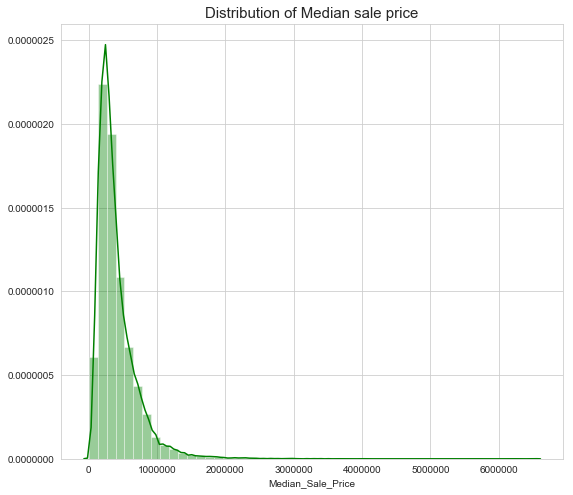

In [30]:
import seaborn as sns
plt.figure(figsize=(9, 8))
sns.distplot(data['Median_Sale_Price'], color='g', bins=50, hist_kws={'alpha': 0.4});#make a logerithemic 
plt.title("Distribution of Median sale price", size = 15)

Text(0.5, 1.0, 'Distribution of Homes Sold')

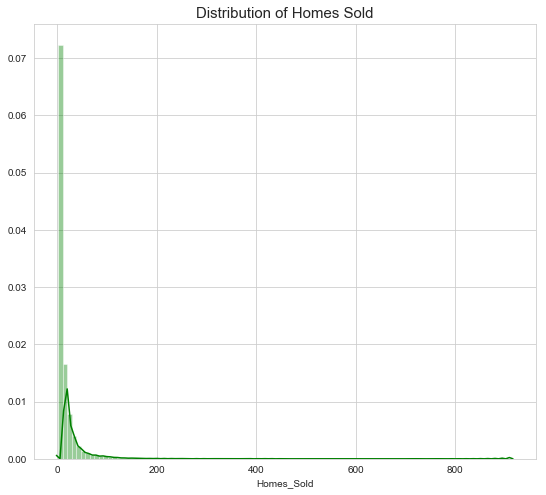

In [31]:
import seaborn as sns
plt.figure(figsize=(9, 8))
sns.distplot(data['Homes_Sold'], color='g', bins=100, hist_kws={'alpha': 0.4})
#ax.set_title("Homes Sold Distribution",size=20)
plt.title("Distribution of Homes Sold", size = 15)

Text(0.5, 1.0, 'Univariate Analysis')

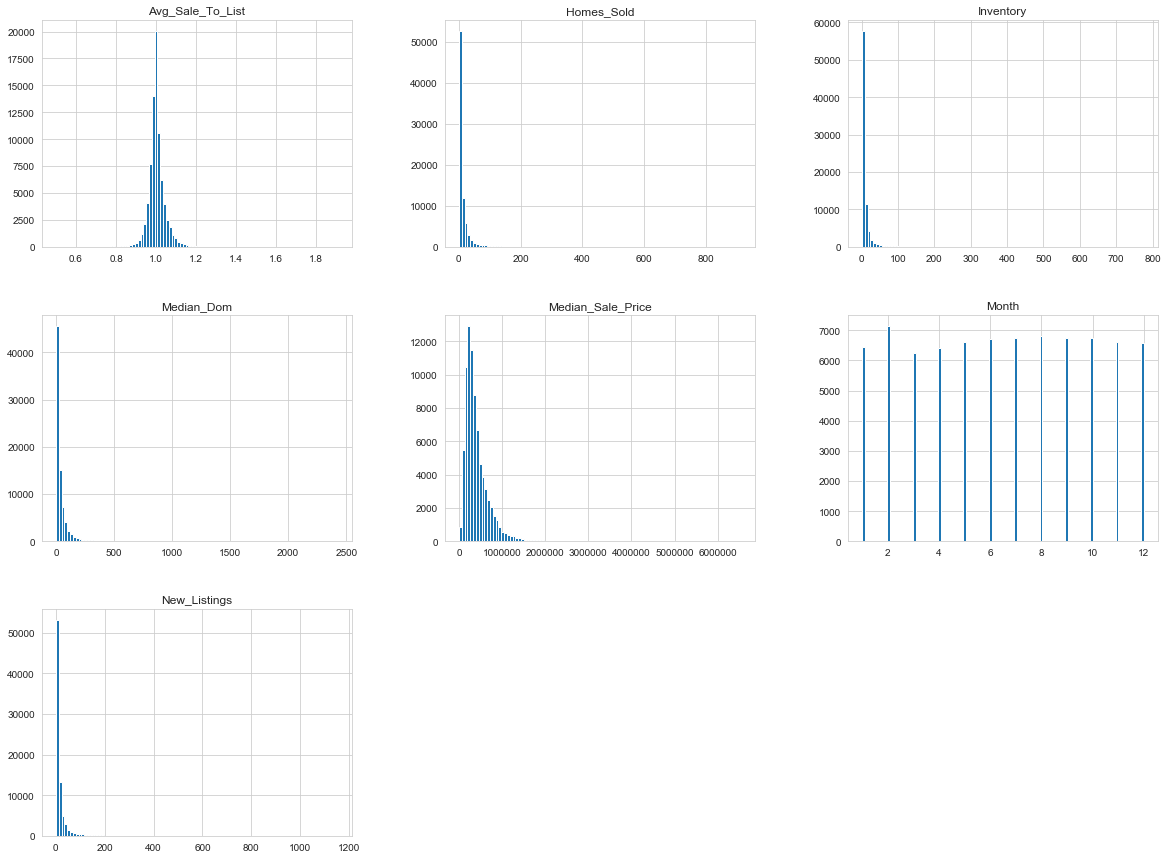

In [32]:
# distribution of all data univariate
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=100, figsize=(20,15))
plt.title("Univariate Analysis", size = 15)

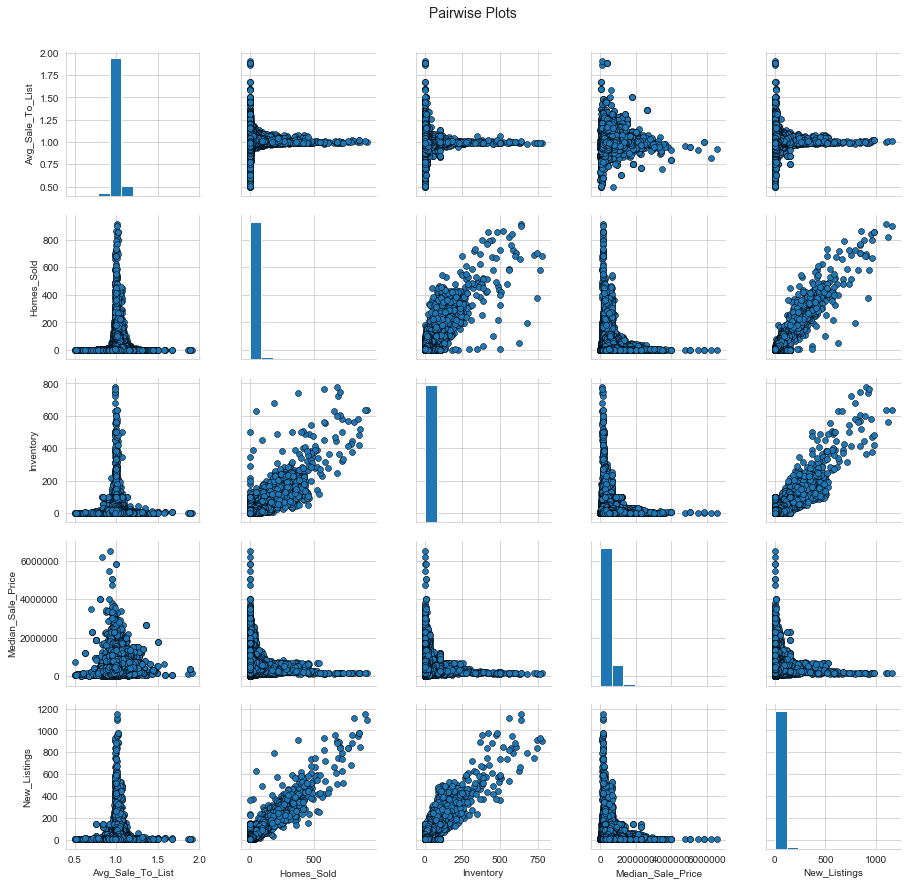

In [33]:
# relation between numerical variables
attributes = ["Avg_Sale_To_List", "Homes_Sold", "Inventory", "Median_Sale_Price","New_Listings"]
pp = sns.pairplot(data[attributes],palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle(' Pairwise Plots', fontsize=14)
plt.show()

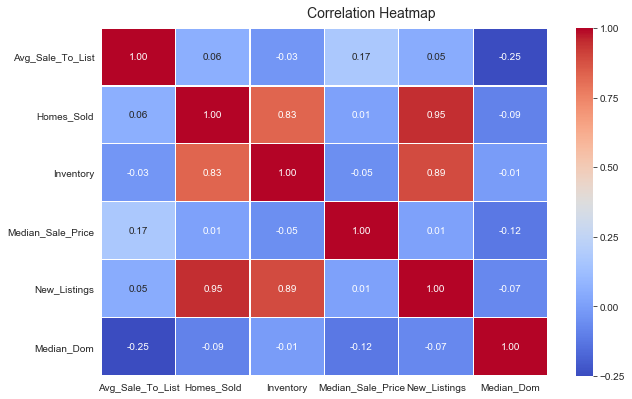

In [35]:
# Correlation Matrix Heatmap
fig, ax = plt.subplots(figsize=(10, 6))
attributes = ["Avg_Sale_To_List", "Homes_Sold", "Inventory", "Median_Sale_Price","New_Listings","Median_Dom"]
corr = data[attributes].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
fig.subplots_adjust(top=0.93)
t = fig.suptitle('Correlation Heatmap', fontsize=14)
plt.show()

### Visualization

Visualization is performed to understand the below questions
Q1) What is the house market in Washington area? How many homes are being sold, what is the median sale price across years?
Q2) Do we see any pattern in Homes Sold in Washington area? Is it selling more or less during any period?
Q3) What are the top and bottom cities in Homes Sales and Sale price
Q4) Do we see any drop in sales in the last year?Has the housing makret changed in 2018?

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text yticklabel objects>)

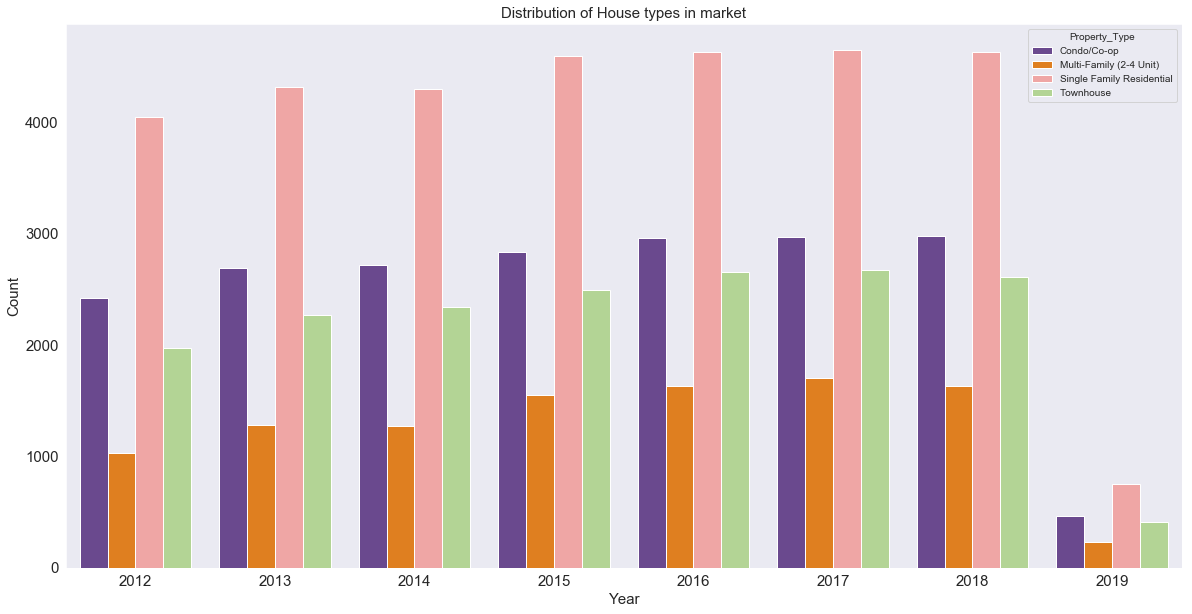

In [36]:
import seaborn as sns
homestype = data.groupby(['Year','Property_Type']).size().reset_index()
homestype=homestype.rename({0:"Count"} ,axis='columns')
sns.set_style("dark")
x=homestype['Year']
y=homestype['Count']
plt.figure(figsize=(20,10))
sns.barplot(data=homestype,x=x,y=y,hue='Property_Type',palette='Paired_r')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Distribution of House types in market", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 <a list of 85 Text xticklabel objects>)

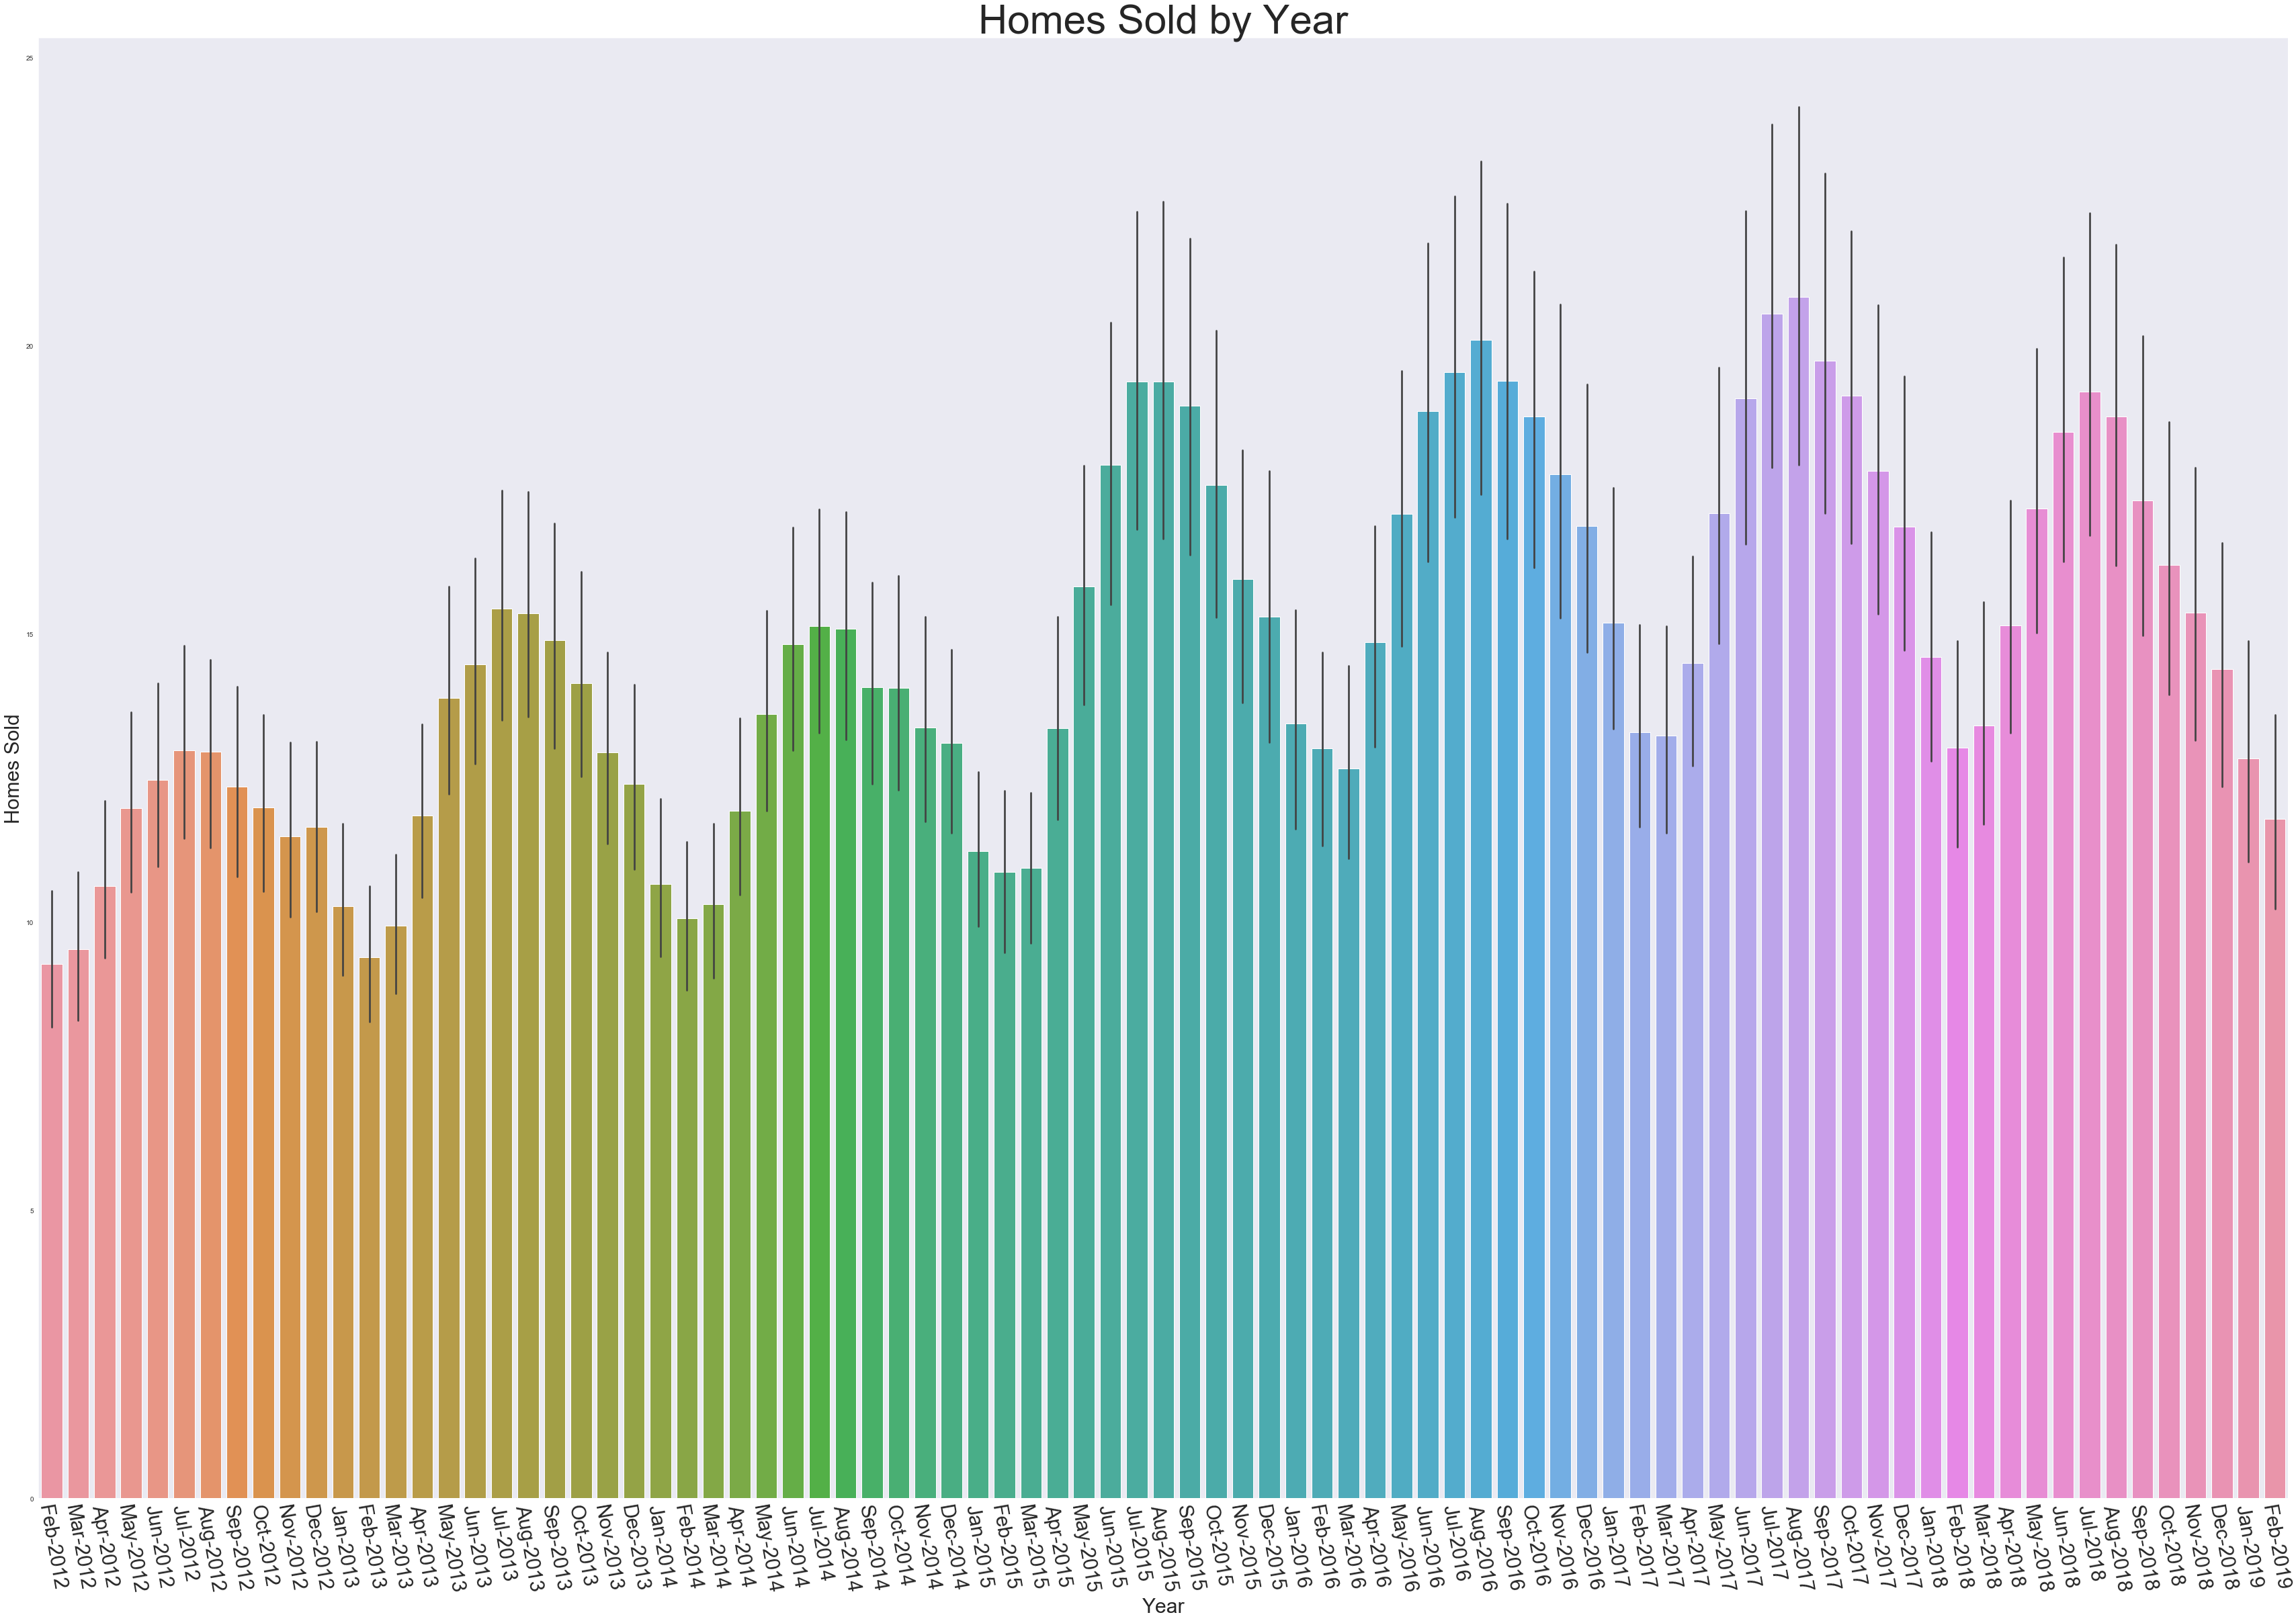

In [37]:
# house sold each month and year
fig, ax1 = plt.subplots() 
fig.set_size_inches(60, 40)  
ax1 = sns.barplot(x ="MonthOfYear", y ="Homes_Sold" ,data = data.sort_values(['Year','Month']) )  
ax1.set(xlabel ='Year', ylabel ='Home sold') 
plt.xlabel('Year', fontsize=30)
plt.ylabel('Homes Sold', fontsize = 30)
ax1.set_title('Homes Sold by Year', size = 60)  
plt.xticks(rotation =-80, fontsize=30) 

In [40]:
# group by region-year-monthin sort
group = data.groupby(['City','Year','Month','MonthOfYear','Period_End']).sum().sort_values(['City','Year','Month','MonthOfYear','Period_End']).reset_index()
group
#groupcity to take top ten
group.sort_values('Median_Sale_Price').head()

,City,Year,Month,MonthOfYear,Period_End,Avg_Sale_To_List,Homes_Sold,Inventory,Median_Dom,Median_Sale_Price,New_Listings
952,Cavalero,2013,7,Jul-2013,2013-07-31,1.290832,1,7.0,8.0,123000,9.0
951,Cavalero,2013,6,Jun-2013,2013-06-30,1.290832,1,6.0,8.0,123000,5.0
3407,Picnic Point,2012,10,Oct-2012,2012-10-31,0.946720,2,5.0,25.0,170000,5.0
3401,Picnic Point,2012,4,Apr-2012,2012-04-30,0.970022,4,3.0,25.5,203000,5.0
3402,Picnic Point,2012,5,May-2012,2012-05-31,1.008672,5,3.0,36.0,210000,6.0


(array([0.0e+00, 2.0e+07, 4.0e+07, 6.0e+07, 8.0e+07, 1.0e+08, 1.2e+08,
        1.4e+08, 1.6e+08, 1.8e+08]), <a list of 10 Text yticklabel objects>)

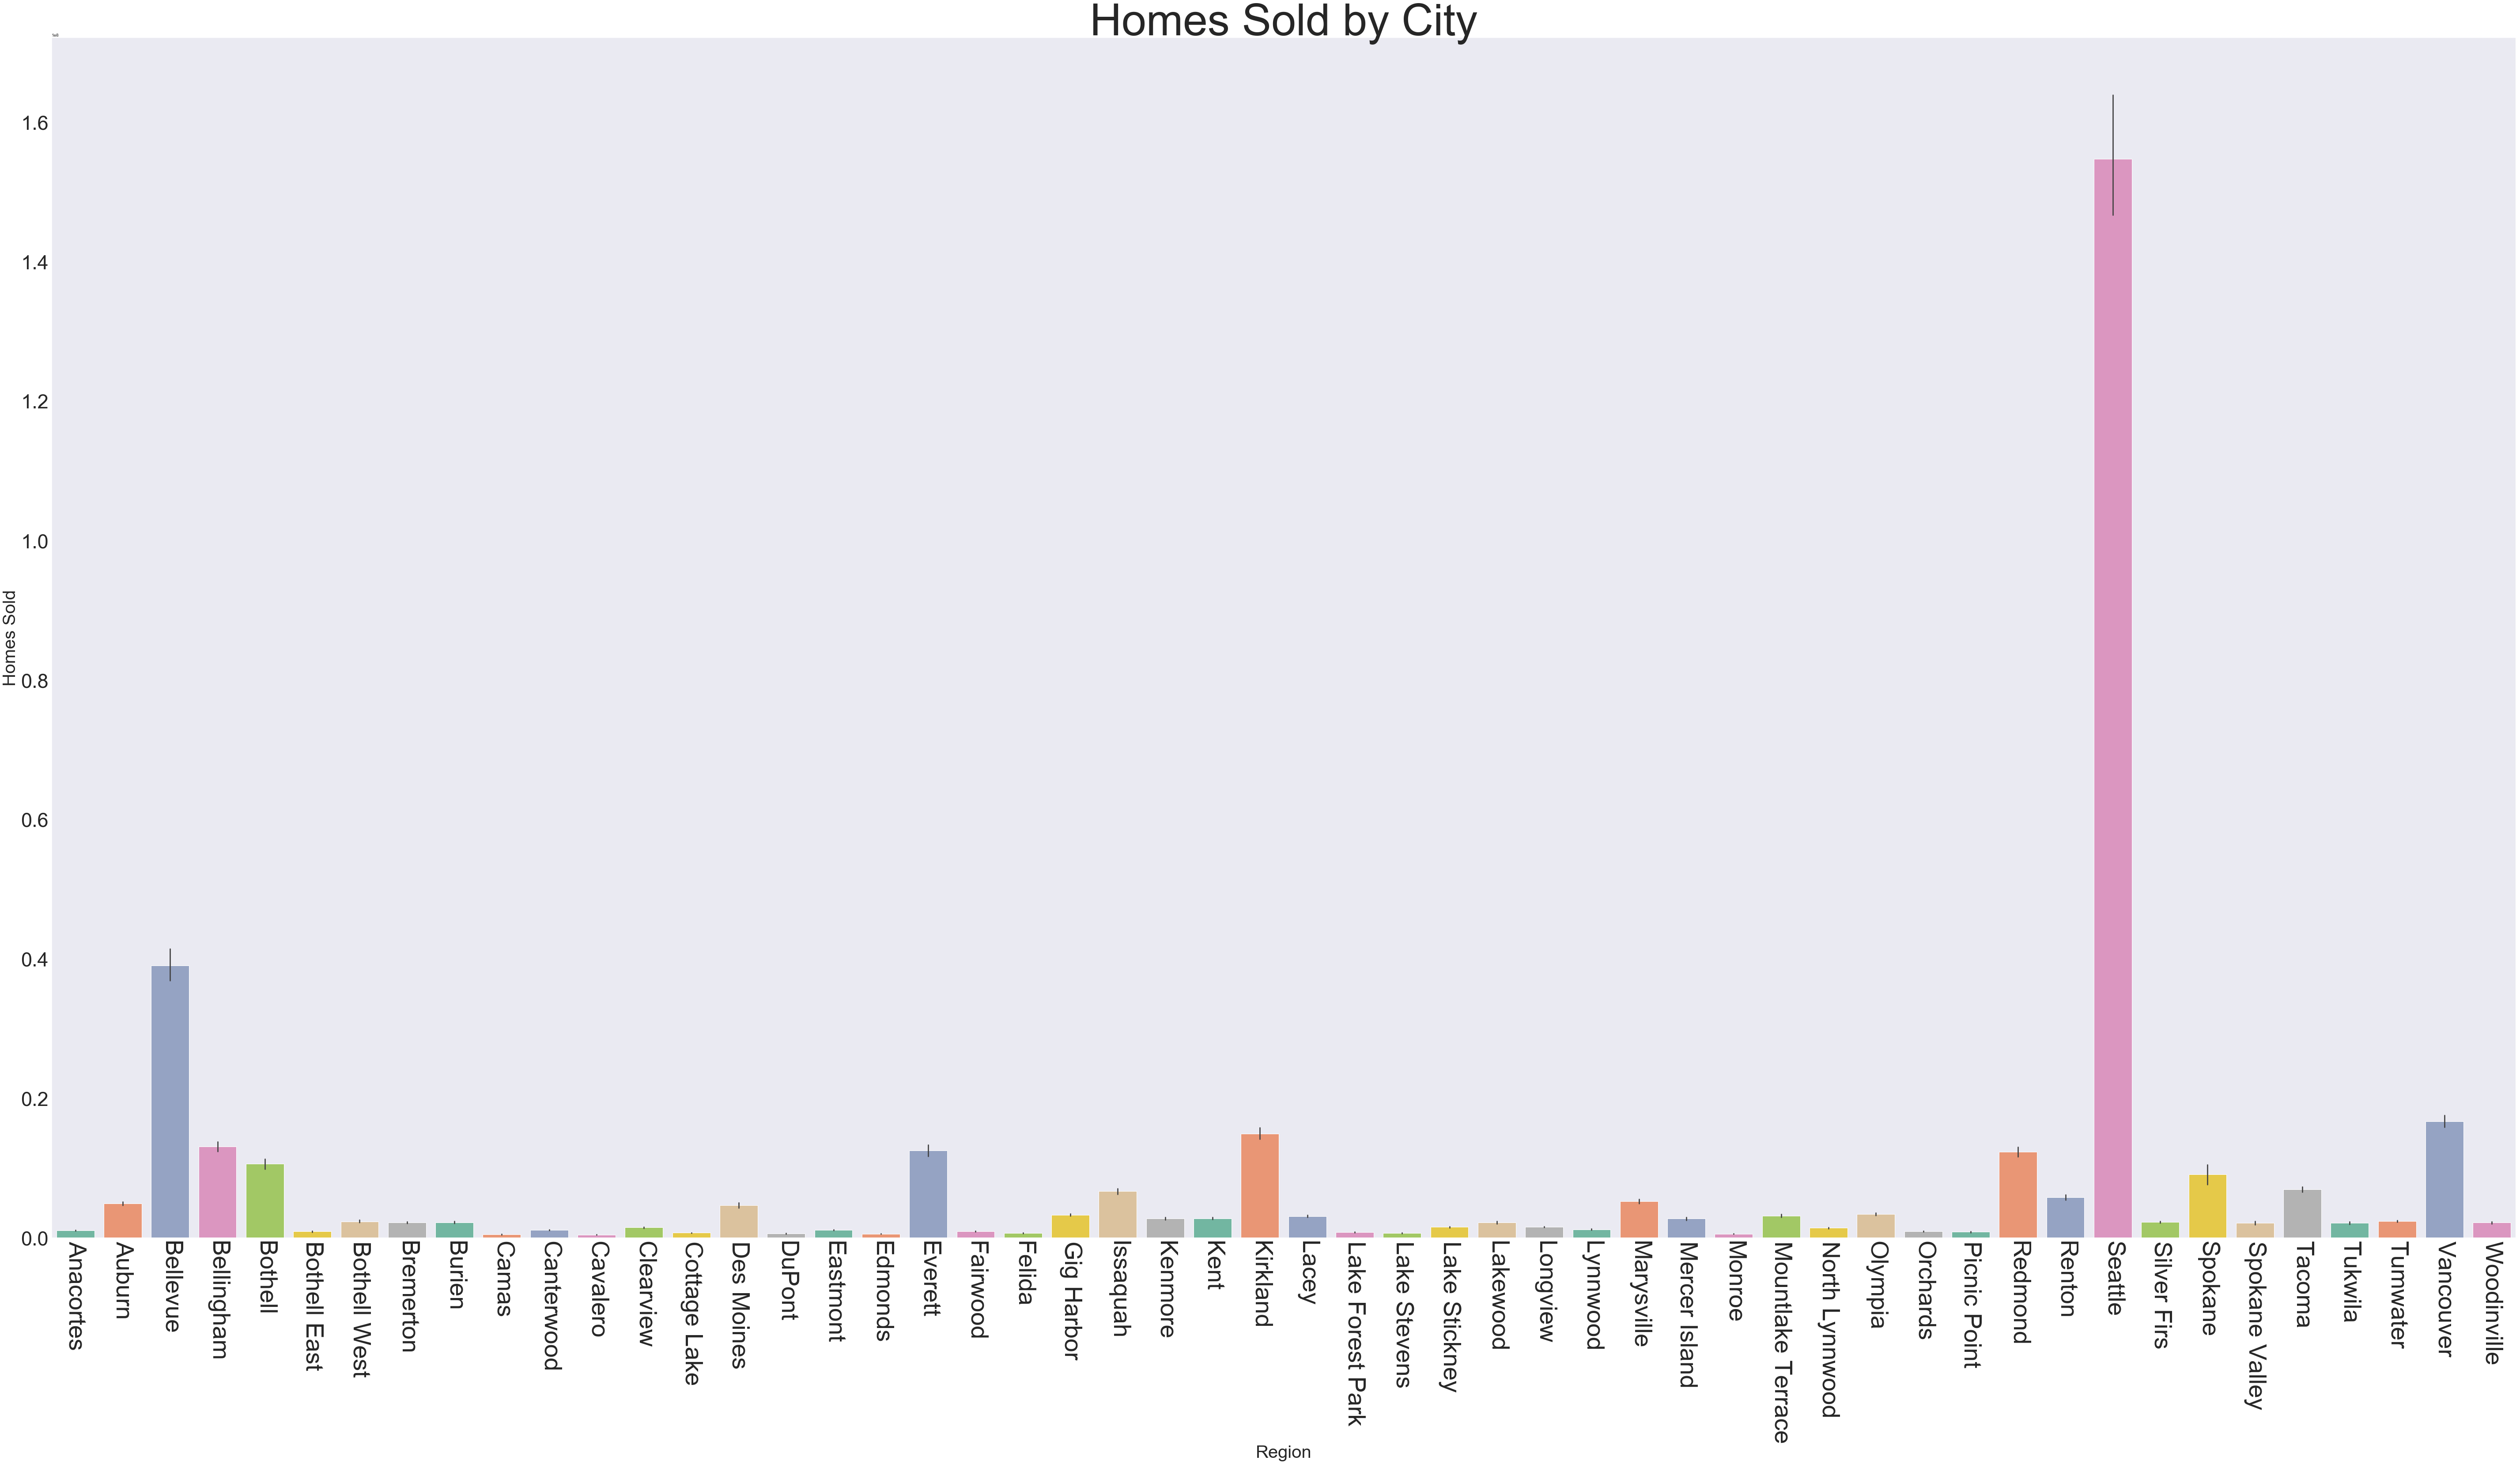

In [41]:
#bar plot to show sale price by city before splitting
fig, ax1 = plt.subplots() 
fig.set_size_inches(100,50) 
ax1 = sns.barplot(x ="City", y ="Median_Sale_Price" ,data = group,palette ="Set2")   
plt.xlabel("Region", fontsize = 40)
plt.ylabel("Homes Sold", fontsize = 40)
ax1.set_title('Homes Sold by City', size = 100)   
plt.xticks(rotation =-90, fontsize=55) 
plt.yticks(fontsize=45)

In [95]:
# generate a grouping to split data set into top and bottom areas based on homes sold and sale price
bottom_ten = data.groupby(['City']).sum().sort_values('Median_Sale_Price').head(15).reset_index()
top_ten = data.groupby(['City']).sum().sort_values('Median_Sale_Price',ascending=False).head(15).reset_index()
bottom_ten_homes = data.groupby(['City']).sum().sort_values('Homes_Sold').head(15).reset_index()
top_ten_homes = data.groupby(['City']).sum().sort_values('Homes_Sold',ascending=False).head(15).reset_index()

In [96]:
# from subgroup use on main group data set
toptencols = list(top_ten['City'])
toptendf = group.loc[group['City'].isin(toptencols)]
bottomcols = list(bottom_ten['City'])
bottomtendf = group.loc[group['City'].isin(bottomcols)]
# do the same for homes
toptencolshomes = list(top_ten['City'])
toptendf_homes = group.loc[group['City'].isin(toptencols)]
bottomcolshomes = list(bottom_ten['City'])
bottomtendf_homes = group.loc[group['City'].isin(bottomcols)]


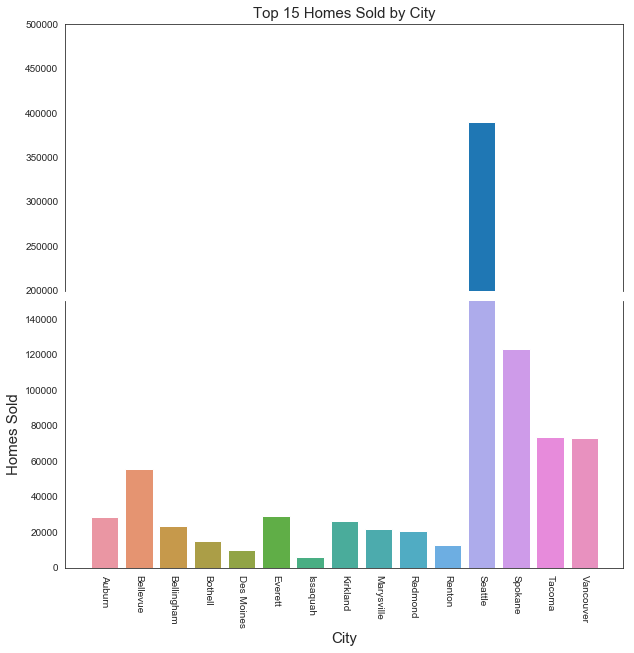

In [106]:
#bar with custom interval
bar_top_homes = toptendf_homes.groupby('City').sum().reset_index()
sns.set_style("white")
x=bar_top_homes['City']
y=bar_top_homes['Homes_Sold']
f,(ax,ax2) = plt.subplots(2,1,sharex=True, facecolor='w')    
f.set_size_inches(10,10)
ax.set_ylim(200000,500000)
#ax2.bar(x, y)
ax2= sns.barplot(x=x,y=y)
ax.bar(x,y)
#ax= sns.barplot(x=x,y=y)

ax2.set_ylim(0,150000)
ax2.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x',bottom=False,which='both',top=False,labelbottom=False)
plt.subplots_adjust(hspace=0.04)
plt.xlabel("City", fontsize = 15)
plt.ylabel("Homes Sold", fontsize = 15)
ax.set_title('Top 15 Homes Sold by City', size = 15)   
plt.xticks(rotation =-90, fontsize=10) 
plt.yticks(fontsize=10)
#ax.tick_params(labelbottom='off')

#ax2.tick_params(labeltop='off')
ax.plot()

plt.show()

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]), <a list of 9 Text yticklabel objects>)

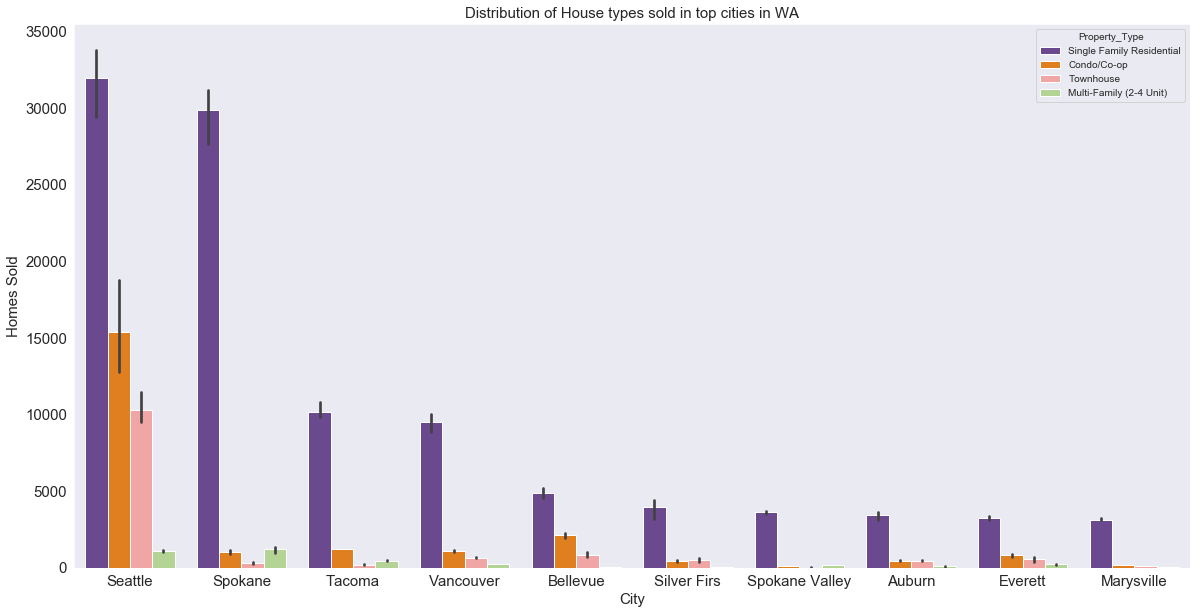

In [45]:
homesoldcity = data.groupby(['City','Year',"Property_Type"]).sum().reset_index().sort_values(by='Homes_Sold', ascending=False)
top10_homessold= homesoldcity.loc[homesoldcity['City'].isin(list(homesoldcity['City'].unique())[:10])]
last_3yr= top10_homessold[top10_homessold['Year'].isin(["2016",'2017',"2018"])]

#last_3yr = last_3yr.groupby(['City','Property_Type']).size().reset_index()
#last_3yr=last_3yr.rename({0:"Count"} ,axis='columns')
sns.set_style("dark")
x=last_3yr['City']
y=last_3yr['Homes_Sold']
plt.figure(figsize=(20,10))
sns.barplot(data=last_3yr,x=x,y=y,hue='Property_Type',palette='Paired_r')
plt.xlabel("City", fontsize=15)
plt.ylabel("Homes Sold", fontsize=15)
plt.title("Distribution of House types sold in top cities in WA", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]), <a list of 10 Text yticklabel objects>)

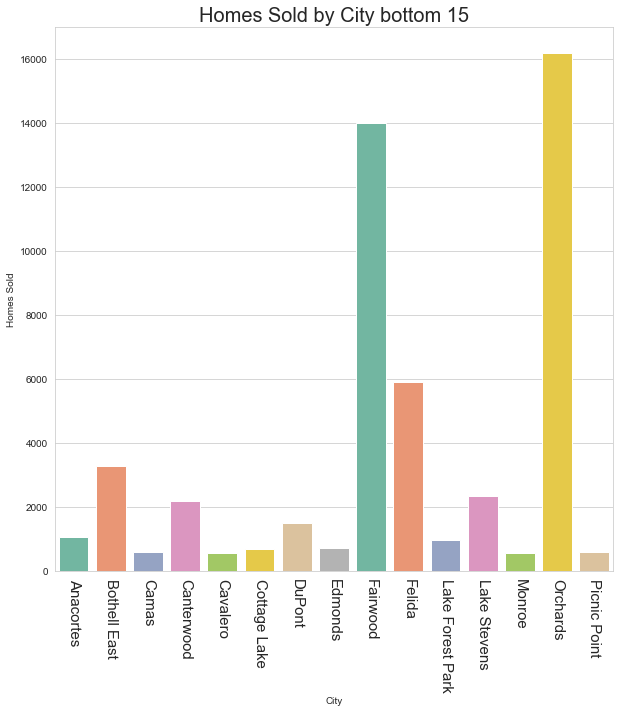

In [99]:
# final bar to show homes sold in bottom
# bar for bottom homes
#sns.set_style('whitegrid')
fig, ax1 = plt.subplots() 
fig.set_size_inches(10,10)
bar_bottom_homes = bottomtendf_homes.groupby('City').sum().reset_index()
ax1 = sns.barplot(x ="City", y ="Homes_Sold" ,data = bar_bottom_homes,palette ="Set2")   
plt.xlabel("City", fontsize = 10)
plt.ylabel("Homes Sold", fontsize = 10)
ax1.set_title('Homes Sold by City bottom 15', size = 20)   
plt.xticks(rotation =-90, fontsize=15) 
plt.yticks(fontsize=10)

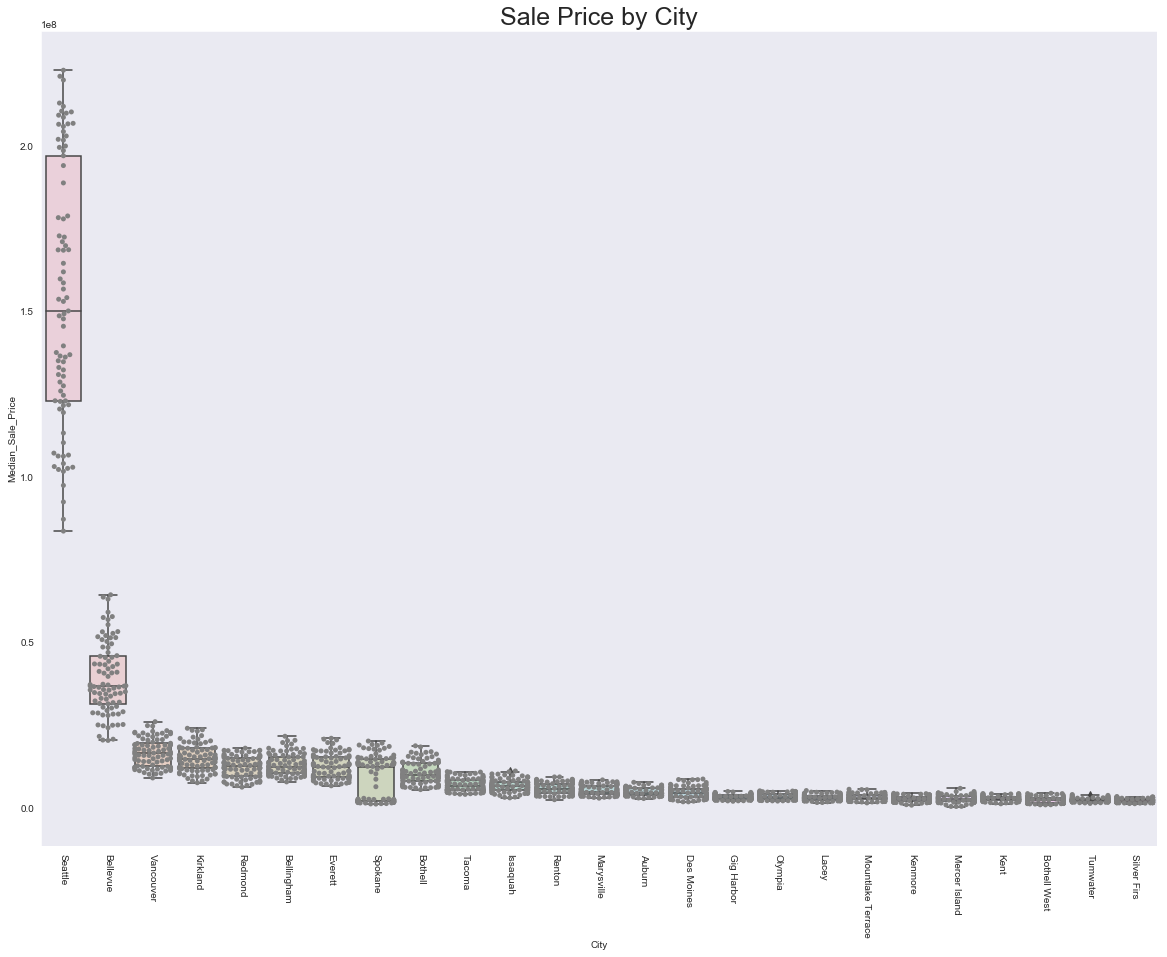

In [52]:
#boxplot of homes sold with city jitter
import seaborn as sns
plt.figure(figsize=(20,15))
my_order = toptendf.groupby('City')['Median_Sale_Price'].median().sort_values(ascending=False).iloc[::].index
ax= sns.boxplot(y=toptendf['Median_Sale_Price'],x=toptendf['City'], width=0.8, sym="x", order=my_order)
plt.xticks(rotation =-90) 
ax.set_title('Sale Price by City',size = 25)   
ax = sns.swarmplot(x=toptendf['City'], y=toptendf['Median_Sale_Price'], data=toptendf, color="grey",order=my_order)
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .3))

In [53]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
trace_a = go.Bar(x=last_3yr[last_3yr['Property_Type']=="Condo/Co-op"]['City'],
                y=last_3yr[last_3yr['Property_Type']=="Condo/Co-op"]['Median_Sale_Price'],
                name="Condo/Co-op",
                marker=dict(color='#A2D5F2'))

trace_b = go.Bar(x=last_3yr[last_3yr['Property_Type']=="Single Family Residential"]['City'],
                y=last_3yr[last_3yr['Property_Type']=="Single Family Residential"]['Median_Sale_Price'],
                name='Single Family Residential',
                marker=dict(color='#FFCDD2'))
trace_c = go.Bar(x=last_3yr[last_3yr['Property_Type']=="Multi-Family (2-4 Unit)"]['City'],
                y=last_3yr[last_3yr['Property_Type']=="Multi-Family (2-4 Unit)"]['Median_Sale_Price'],
                name="Multi-Family (2-4 Unit)",
                marker=dict(color='#4806d6'))
trace_d = go.Bar(x=last_3yr[last_3yr['Property_Type']=="Townhouse"]['City'],
                y=last_3yr[last_3yr['Property_Type']=="Townhouse"]['Median_Sale_Price'],
                name="Townhouse",
                marker=dict(color='#b96e90'))
    

data3 = go.Data([trace_a,trace_b,trace_c,trace_d])
layout = {"title" :"Distribution of House types sold in top cities in WA",
                   "yaxis":{"title":'Homes Sold'},
                   "xaxis":{"title":'City'}}

plotly.offline.iplot(data3,layout, filename='jupyter/basic_bar')

In [58]:
pasttwoyears= toptendf[toptendf_homes['Year'].isin(['2017','2018','2012','2016'])][toptendf_homes['City'].isin(toptencols[:5])]


C:\Users\bhara\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Meadian sale price by year in top5 cities year wise')

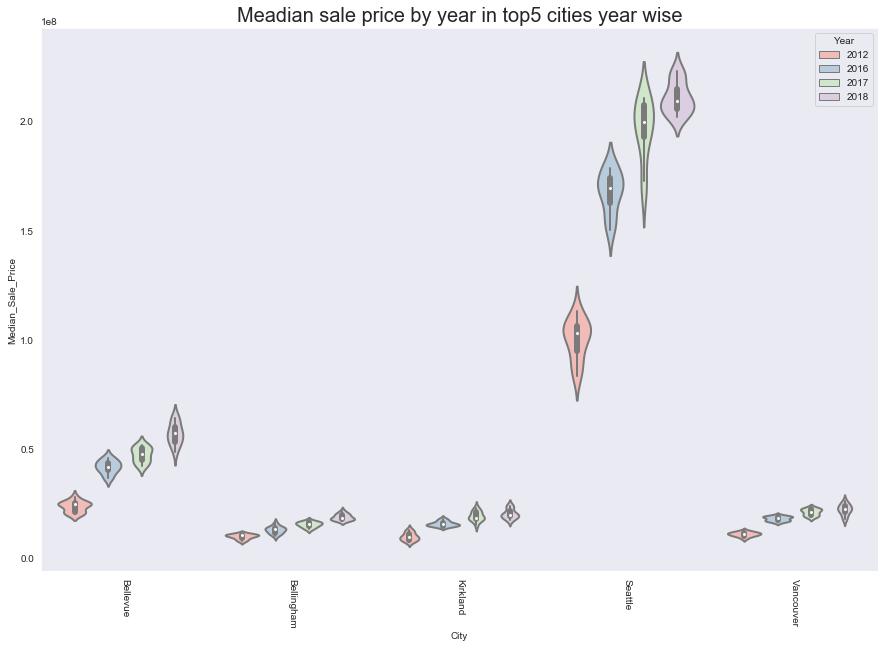

In [59]:
# for top 5 cities compare the price change between 2012,2017 and 2018
plt.figure(figsize=(15,10))
#ax.set_title("Meadian sale price by year in top5 cities ",size = 20)
sns.violinplot( x="City", y="Median_Sale_Price",hue="Year",palette="Pastel1"
               ,width=0.8,linewidth=2,data=pasttwoyears)

plt.xticks(rotation =-90, fontsize=10) 
plt.title("Meadian sale price by year in top5 cities year wise",size = 20)

In [93]:
# get top 5 city df
pasttwoyears_homes= toptendf_homes[toptendf_homes['Year'].isin(['2017','2018','2012','2016'])]
pasttwoyears_homes = pasttwoyears_homes[pasttwoyears_homes['City'].isin(toptencolshomes[:5])]

Text(0.5, 1.0, 'Homes sold by year in top5 cities')

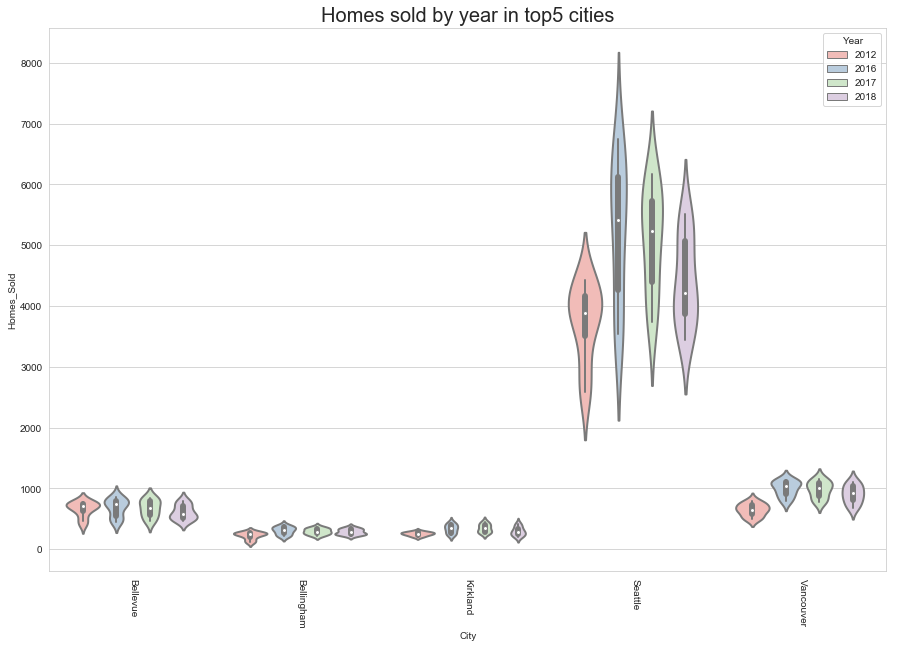

In [94]:
# for top 5 cities compare the price change between 2012,2017 and 2018
plt.figure(figsize=(15,10))
sns.violinplot( x="City", y="Homes_Sold",hue="Year",width=0.8,palette="Pastel1",linewidth=2,data=pasttwoyears_homes)
plt.xticks(rotation =-90, fontsize=10) 
#ax.set_title("Homes sold by year in top5 cities",size = 20)
plt.title("Homes sold by year in top5 cities",size = 20)

### Trends over years

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

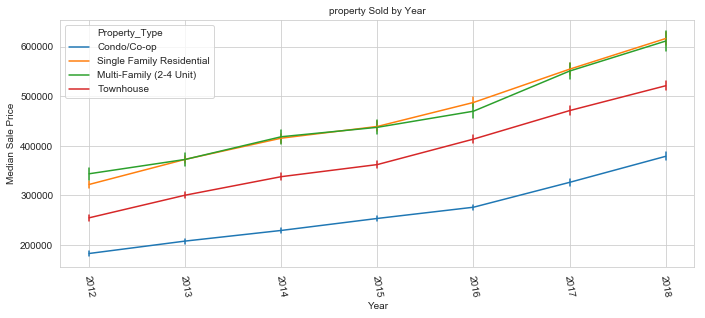

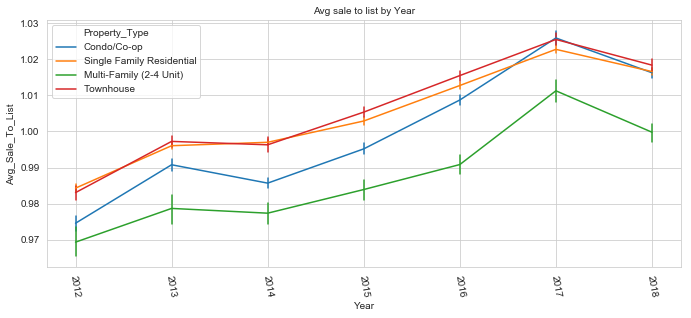

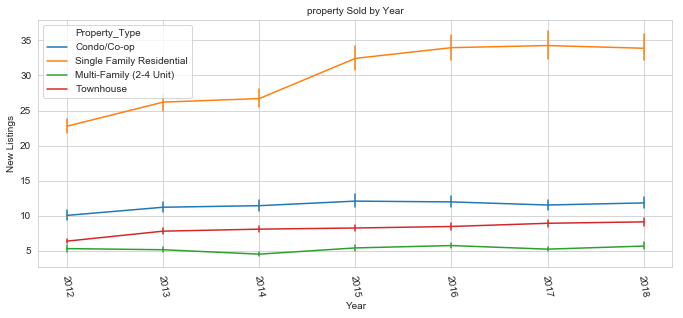

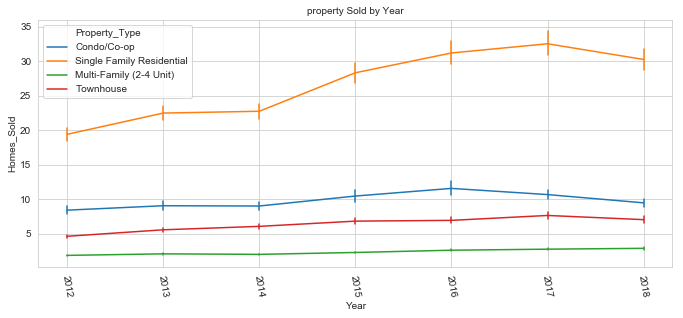

In [67]:
yeardata = data[data['Year']!="2019"]
# house sold each month and year
sns.set_style("whitegrid")
fig, ax = plt.subplots() 
plt.subplot(2, 2, 1) 
fig.set_size_inches(25, 10)  
ax = sns.lineplot(x ="Year", y ='Median_Sale_Price' ,hue= "Property_Type",data = yeardata.sort_values('Year'),  err_style="bars")  
#ax1.set(xlabel ='Year', ylabel ='Home sold')
plt.legend(title_fontsize = 10,loc = 'upper left')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Median Sale Price', fontsize = 10)
ax.set_title('property Sold by Year', size = 10)  
plt.xticks(rotation =-80, fontsize=10)


# house sold each month and year
fig, ax = plt.subplots() 
plt.subplot(2,2,1)
fig.set_size_inches(25, 10)  
ax = sns.lineplot(x ="Year", y ='Avg_Sale_To_List' ,hue= "Property_Type",data = yeardata.sort_values('Year'),  err_style="bars")  
#ax1.set(xlabel ='Year', ylabel ='Home sold')
plt.legend(title_fontsize = 10,loc = 'upper left')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Avg_Sale_To_List', fontsize = 10)
ax.set_title('Avg sale to list by Year', size = 10)  
plt.xticks(rotation =-80, fontsize=10) 

# house sold each month and year
fig, ax = plt.subplots() 
plt.subplot(2,2,2)
fig.set_size_inches(25, 10)  
ax = sns.lineplot(x ="Year", y ='New_Listings' ,hue= "Property_Type",data = yeardata.sort_values('Year'),  err_style="bars")  
#ax1.set(xlabel ='Year', ylabel ='Home sold')
plt.legend(title_fontsize = 10,loc = 'upper left')
plt.xlabel('Year', fontsize=10)
plt.ylabel('New Listings', fontsize = 10)
ax.set_title('property Sold by Year', size = 10)  
plt.xticks(rotation =-80, fontsize=10) 


fig, ax = plt.subplots()
plt.subplot(2,2,2)
fig.set_size_inches(25, 10)  
ax = sns.lineplot(x ="Year", y ='Homes_Sold' ,hue= "Property_Type",data = yeardata.sort_values('Year'),  err_style="bars")  
#ax1.set(xlabel ='Year', ylabel ='Home sold')
plt.legend(title_fontsize = 10,loc = 'upper left')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Homes_Sold', fontsize = 10)
ax.set_title('property Sold by Year', size = 10)  
plt.xticks(rotation =-80, fontsize=10) 



([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

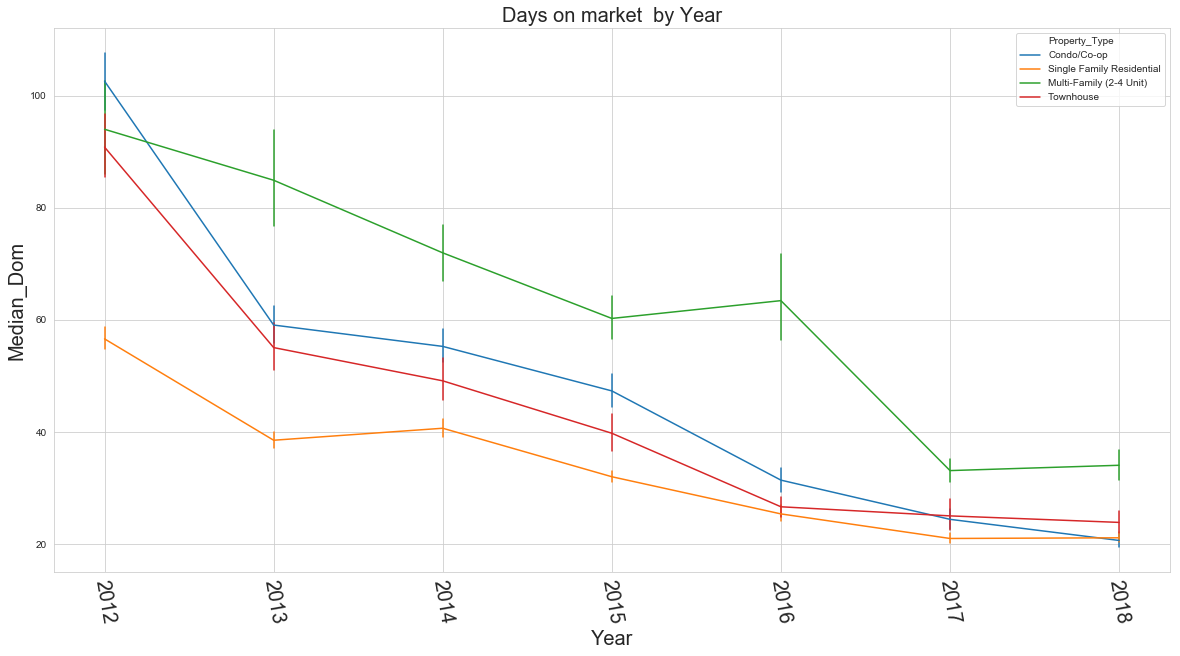

In [103]:
fig, ax = plt.subplots() 
fig.set_size_inches(20, 10)  
ax = sns.lineplot(x ="Year", y ='Median_Dom' ,hue= "Property_Type",data = yeardata.sort_values('Year'),  err_style="bars")  
#ax1.set(xlabel ='Year', ylabel ='Home sold')
plt.legend(title_fontsize = 20,loc = 'upper right')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Median_Dom', fontsize = 20)
ax.set_title('Days on market  by Year', size = 20)  
plt.xticks(rotation =-80, fontsize=20) 

## Regression

Prediction of home sales in washington using Linear and Random forest regression models

In [147]:
!pip install scikit-learn

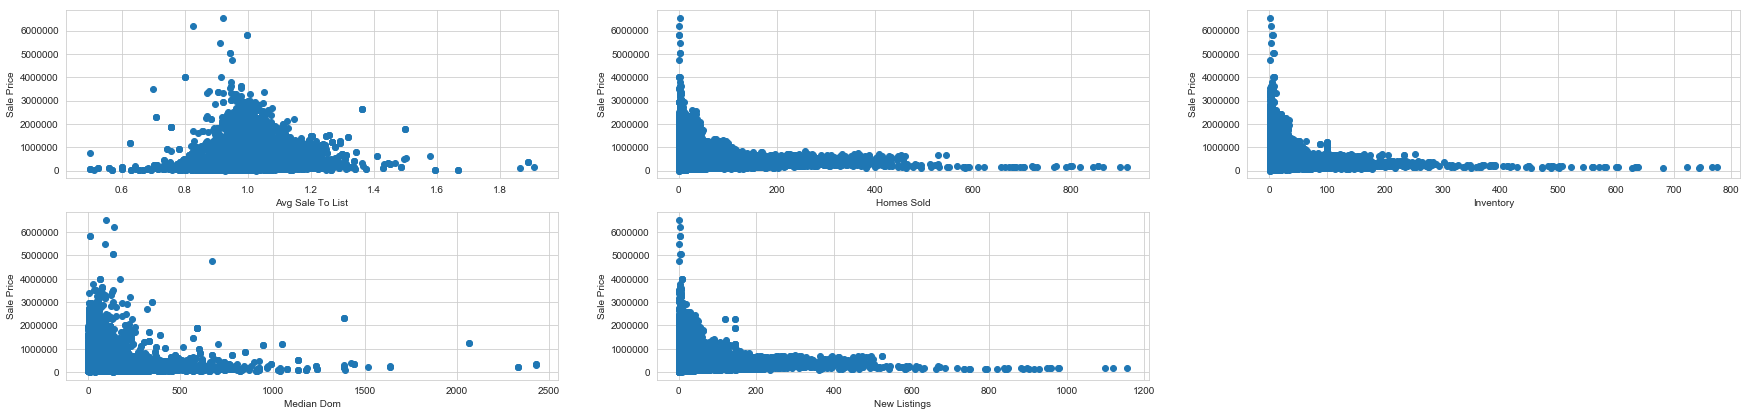

In [101]:
# Feature exploration
# Sale Price doesnt have a feature correlation except for 'Avg Sale to list' column, which is not effective, hence we will not predict the sale price.
plt.figure(figsize=(30,10.5))
plot_count = 1
cols = ['Avg_Sale_To_List','Homes_Sold','Inventory','Median_Dom','New_Listings','Year','Month']
for feature in cols[:-2]:
    plt.subplot(3,3,plot_count)
    plt.scatter(data[feature], data['Median_Sale_Price'])
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('Sale Price')
    plot_count+=1
plt.show()

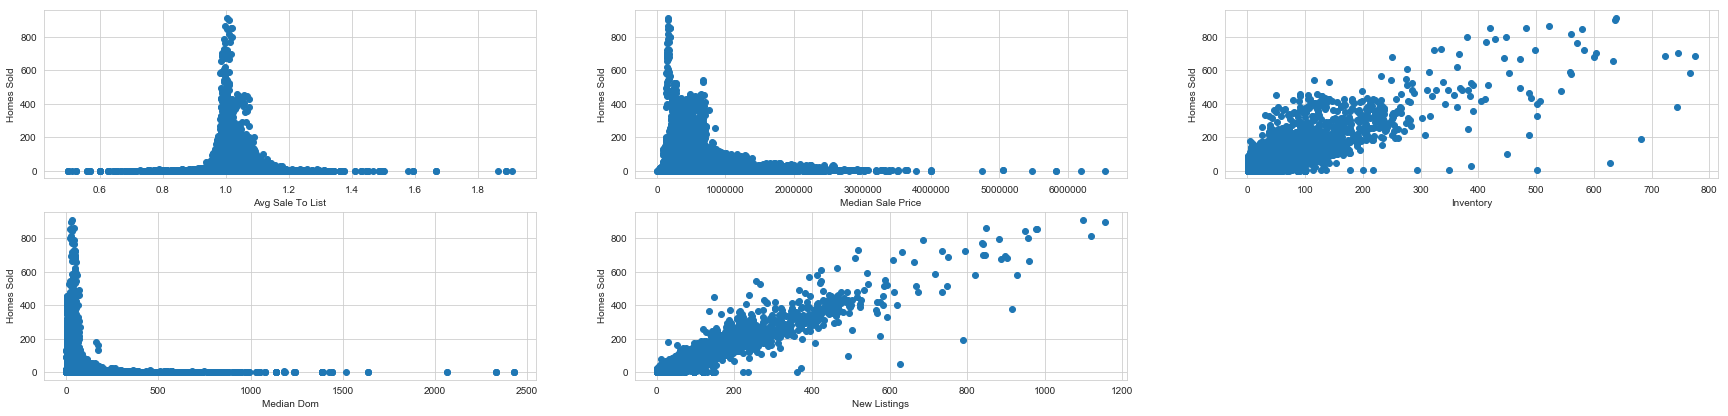

In [102]:
# Feature exploration Homes sold
plt.figure(figsize=(30,10.5))
plot_count = 1
cols = ['Avg_Sale_To_List','Median_Sale_Price','Inventory','Median_Dom','New_Listings','Year','Month']
for feature in cols[:-2]:
    plt.subplot(3,3,plot_count)
    plt.scatter(data[feature], data['Homes_Sold'])
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('Homes Sold')
    plot_count+=1
plt.show()

Text(0.5, 1.0, 'Scatter Plot')

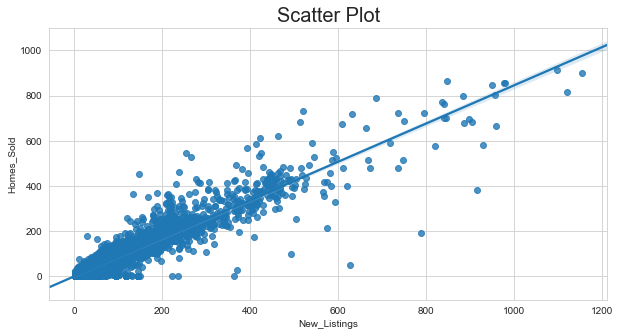

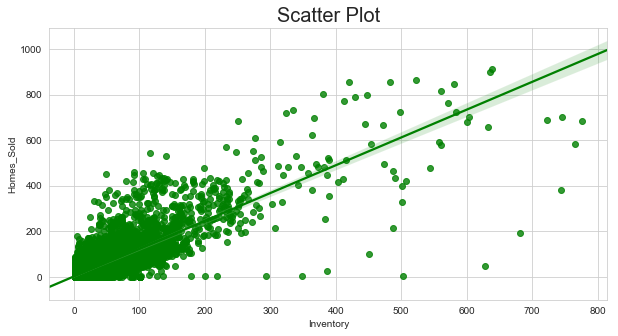

In [75]:
#checking linear relation between number of homes sold and inventory and new listings
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.regplot(x="New_Listings",y="Homes_Sold",data=data)
plt.xlabel('New_Listings', fontsize=10)
plt.ylabel('Homes_Sold', fontsize = 10)
plt.title('Scatter Plot', size = 20) 


fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.title('Scatter Plot', size = 20)
sns.regplot(data["Inventory"],data["Homes_Sold"],color ='g')
plt.xlabel('Inventory', fontsize=10)
plt.ylabel('Homes_Sold', fontsize = 10)
plt.title('Scatter Plot', size = 20) 



In [73]:
# predict homesold with year,month,price,area,property
# ohe
indepvar2 = data.drop(['Homes_Sold','Period_End',"Region","MonthOfYear",'Region_Type', 'State_Code','Median_Sale_Price','Avg_Sale_To_List','Median_Dom'], axis=1)
indepvar2.head()


,Inventory,New_Listings,Property_Type,Year,Month,City
0,49.0,51.0,Condo/Co-op,2012,2,Seattle
1,3.0,4.0,Condo/Co-op,2012,6,Everett
2,7.0,4.0,Condo/Co-op,2012,8,Olympia
3,1.0,1.0,Condo/Co-op,2013,1,Renton
4,2.0,3.0,Condo/Co-op,2013,11,Vancouver


In [74]:
indepvar2 = pd.get_dummies(indepvar2, columns=["Property_Type"])
indepvar2= pd.get_dummies(indepvar2, columns=["City"])
indepvar2 = indepvar2.drop(['City_Lacey',], axis='columns')# deleting column to get rid of dummy trapping
indepvar2.head()

,Inventory,New_Listings,Year,Month,Property_Type_Condo/Co-op,Property_Type_Multi-Family (2-4 Unit),Property_Type_Single Family Residential,Property_Type_Townhouse,City_Anacortes,City_Auburn,...,City_Renton,City_Seattle,City_Silver Firs,City_Spokane,City_Spokane Valley,City_Tacoma,City_Tukwila,City_Tumwater,City_Vancouver,City_Woodinville
0,49.0,51.0,2012,2,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3.0,4.0,2012,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,4.0,2012,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,2013,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2.0,3.0,2013,11,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
indepvar2.columns

Index(['Inventory', 'New_Listings', 'Year', 'Month',
       'Property_Type_Condo/Co-op', 'Property_Type_Multi-Family (2-4 Unit)',
       'Property_Type_Single Family Residential', 'Property_Type_Townhouse',
       'City_Anacortes', 'City_Auburn', 'City_Bellevue', 'City_Bellingham',
       'City_Bothell', 'City_Bothell East', 'City_Bothell West',
       'City_Bremerton', 'City_Burien', 'City_Camas', 'City_Canterwood',
       'City_Cavalero', 'City_Clearview', 'City_Cottage Lake',
       'City_Des Moines', 'City_DuPont', 'City_Eastmont', 'City_Edmonds',
       'City_Everett', 'City_Fairwood', 'City_Felida', 'City_Gig Harbor',
       'City_Issaquah', 'City_Kenmore', 'City_Kent', 'City_Kirkland',
       'City_Lake Forest Park', 'City_Lake Stevens', 'City_Lake Stickney',
       'City_Lakewood', 'City_Longview', 'City_Lynnwood', 'City_Marysville',
       'City_Mercer Island', 'City_Monroe', 'City_Mountlake Terrace',
       'City_North Lynnwood', 'City_Olympia', 'City_Orchards',
       'City_

In [78]:
# Linear Regression
depvar = data[['Homes_Sold']]
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indepvar2, depvar, test_size=0.2,random_state=44)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
expected = y_test
print('Linear Regression R squared": %.4f' % lm.score(X_test, y_test))


Linear Regression R squared": 0.8991


In [83]:
#Coefficient calculated
lm.coef_

array([[-0.06933067,  0.8696253 ,  0.30525421,  0.27869719,  0.27590321,
        -1.97189644,  2.13090534, -0.43491212, -0.96343555,  2.09607921,
         1.07741165,  0.3802356 ,  0.41865202,  1.52765312,  0.9393875 ,
         1.58385088,  1.36335317,  0.01615363, -0.80691185, -0.67506854,
         6.22399281, -0.14840599,  0.37363481, -1.22362438,  3.67112327,
        -0.63275587,  1.06104657,  2.02260823,  2.54350262, -0.02002635,
         0.94544396,  0.79211778,  1.18194072,  1.21292652,  0.663423  ,
        -0.22388991,  3.1296945 ,  0.30988324, -0.21052249,  1.93584215,
         0.06245171,  0.21128827,  0.11012567,  0.64108687,  3.49842084,
         0.49222441, -1.46035459,  0.70302462,  1.23685808,  0.4691872 ,
         1.48683787,  6.15594915, -0.26956384, -0.23456339,  2.7332348 ,
         0.26341644, -0.49722037,  1.90647086,  0.22159847]])

In [82]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)#model was able to predict the number of households in the test up to 10

Linear Regression RMSE: 10.5384


In [90]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, np.ravel(y_train))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [91]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_pred))

Random Forest R squared": 0.9381


In [100]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 7.7137


### Conclusion
1) The top 5 homes sold cities in WA are Seattle,Spokane,Tacoma,Vancouver,Bellevue. Majorly Single Family homes are being sold, followed by Condo and townhouse. The percentage of multi family units being sold are very less

2) The Home sales in US follows a trend, there are visibly high sales during the months Jun to Aug and low sales durning Jan to Mar in all the 7 year duration(2012 - 2018) analysed from our data set

3) The top 5 cities in Sale Price differ from the top 5 homes sold cities, which implies the price variation among them. Top 5 cities leading in Sale Price are Seattle, Bellevue, Kirklan, Vancouver, Bellingham.

4) Sale Price has negative correlation with Inventory and New Listings.If more homes are available in inventory or the listing the market reaches a saturation, resulting in price drop.

5) Homes Sold has positive linear correlation with Inventory and New Listings and has been used as features for the models to predict Homes sold.

6) One hot encoder method of transforming categorical variable was found to be effective than the Label encoder method.

7) Linear Regression to predict Homes Sold count resulted in R square = 0.8991

8) Random Forest Regression predicted Homes Sold with an R sqaure metric of 0.9381. The results of this model is better than the results of previous model, as this involves a summation of the values derived from 10 decision tree models.
